In [58]:
import datasets
from datasets import MyDataset
from torchvision import transforms
from torchvision.transforms import ToPILImage
from torch.utils.data import DataLoader

batch_size = 1
shuffle = True
num_workers = 2
num_epochs = 10

mytransform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

/home/vox/Documents/codes/python/wheat_project/datasets.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  column_name = df.applymap(lambda x: x == img).any().idxmax()   #from elemant content search its column name


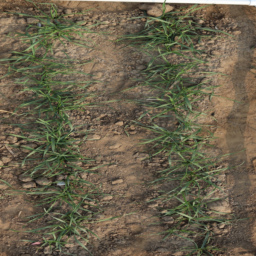

In [59]:
dataset = datasets.MyDataset(path_dir="./datasets", transform=mytransform)
image,tiller_num = dataset[0]

toPIL = transforms.ToPILImage()
a = toPIL(image)
a

In [91]:
dataset = MyDataset(path_dir='./datasets',
                    transform=mytransform)

dataloader = DataLoader(dataset=dataset,
                        batch_size=batch_size,
                        shuffle=shuffle,
                        num_workers=num_workers)

image, n_tiiler = next(iter(dataloader))  
toPIL = transforms.ToPILImage()
print("fffff")
a = toPIL(image[0])
image.shape

/home/vox/Documents/codes/python/wheat_project/datasets.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  column_name = df.applymap(lambda x: x == img).any().idxmax()   #from elemant content search its column name
/home/vox/Documents/codes/python/wheat_project/datasets.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  column_name = df.applymap(lambda x: x == img).any().idxmax()   #from elemant content search its column name
/home/vox/Documents/codes/python/wheat_project/datasets.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  column_name = df.applymap(lambda x: x == img).any().idxmax()   #from elemant content search its column name
/home/vox/Documents/codes/python/wheat_project/datasets.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  column_name = df.applymap(lambda x: x == img).any().idxmax()   #from elemant content sea

AttributeError: Caught AttributeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/vox/miniconda3/envs/wheat/lib/python3.12/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
           ^^^^^^^^^^^^^^^^^^^^
  File "/home/vox/miniconda3/envs/wheat/lib/python3.12/site-packages/torch/utils/data/_utils/fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
  File "/home/vox/Documents/codes/python/wheat_project/datasets.py", line 36, in __getitem__
AttributeError: 'NoneType' object has no attribute 'group'


/home/vox/Documents/codes/python/wheat_project/datasets.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  column_name = df.applymap(lambda x: x == img).any().idxmax()   #from elemant content search its column name
